In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# importing csv file
womens_clothing_data = pd.read_csv("Womens_Clothing_Data_For_Tableau.csv")

#Remove the 'Trend' and 'General' department names due to low number of total reviews
womens_clothing_data = womens_clothing_data[womens_clothing_data['Department Name'] != 'Trend']
womens_clothing_data = womens_clothing_data[womens_clothing_data['Department Name'] != 'General']

#Remove excess columns
womens_clothing_data = womens_clothing_data[['Clothing ID','Department Name','Rating']]

#Preview dataframe
womens_clothing_data

,Clothing ID,Department Name,Rating
0,1077,Dresses,3
1,1049,Bottoms,5
2,847,Tops,5
3,1080,Dresses,2
4,858,Tops,5
...,...,...,...
19670,1104,Dresses,5
19671,862,Tops,3
19672,1104,Dresses,3
19673,1084,Dresses,3


<IPython.core.display.Javascript object>


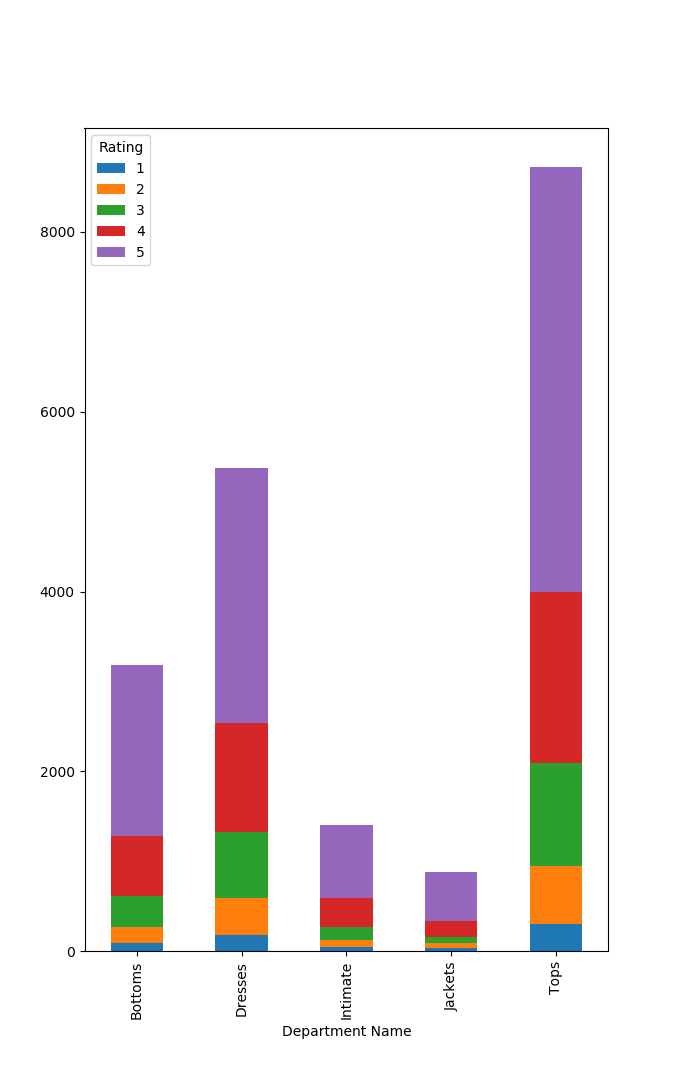

In [4]:
#Group and display the dataframe by 'Department Name', 'Rating'
grouped_womens_clothing_data = womens_clothing_data.groupby(['Department Name', 'Rating'])
grouped_womens_clothing_data = grouped_womens_clothing_data.count()

#Plot bar graph
grouped_womens_clothing_data.unstack().plot(kind='bar',y='Clothing ID', stacked=True)

### The bar chart above shows the total number of reviews by department and does a good jon of illustrating the difference in total volume. However, the percentage breakdown of good --> bad ratings by departmnet is not clear (i.e.likely is each department to have a good or bad review.)

### The bar chart below illustrates the percentage breakout of 1, 2, 3, 4 and 5 rated reviews by department.The distribution was pretty similar across all departments. That said, jackets seem to scew slightly better and dresses slightly worse.

<IPython.core.display.Javascript object>


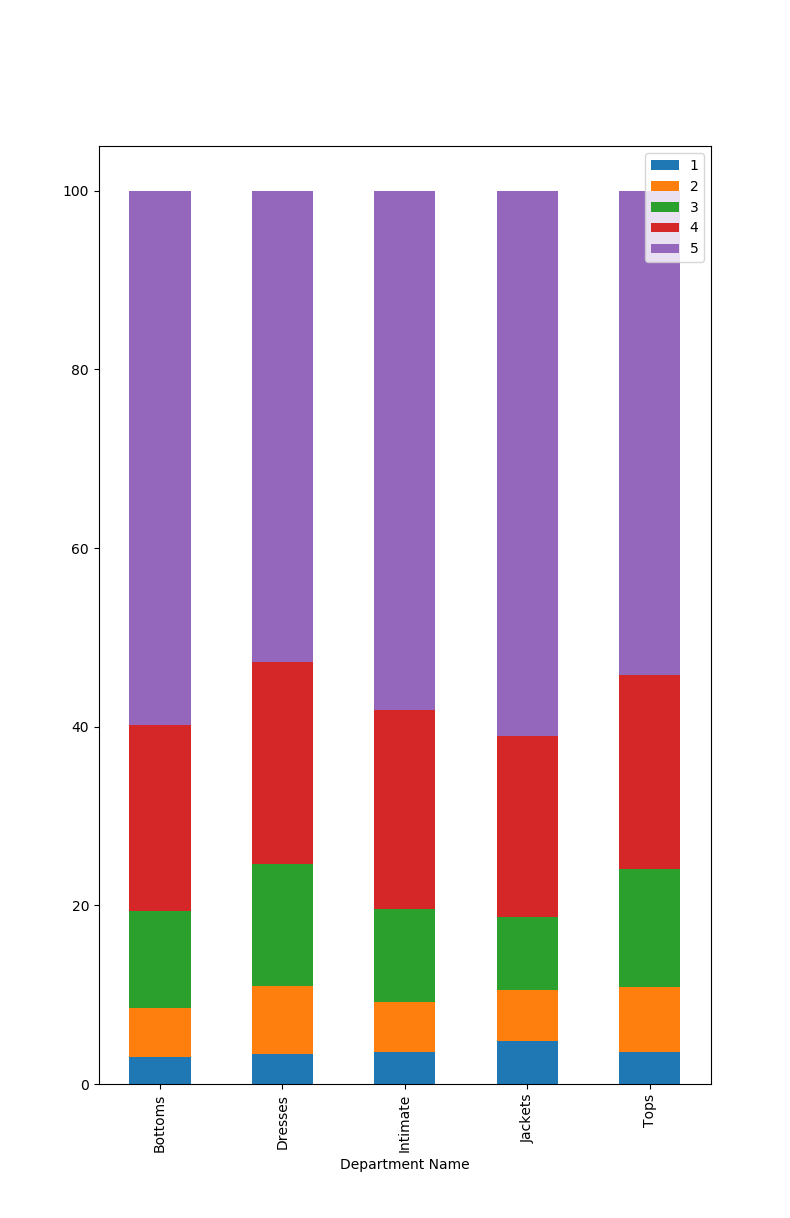

In [5]:
rating_pcts = grouped_womens_clothing_data.groupby(level=0).apply(lambda x:
                                                                  100 * x / float(x.sum()))
rating_pcts.rename(columns={'Clothing ID': '% of Ratings'}, inplace=True)
rating_pcts.unstack().plot(kind='bar',y='% of Ratings', stacked=True)
plt.legend(loc='upper right')